# 02 — Exploratory Data Analysis (EDA)

This notebook explores the cleaned Formula 1 dataset to understand patterns, trends, and relationships that influence race outcomes and podium finishes.

- Driver performance trends  
- Constructor dominance  
- Qualifying vs race performance  
- Circuit characteristics  
- Feature distributions and correlations  

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

In [30]:
df = pd.read_csv("../data/processed/f1_cleaned_dataset.csv")
df.head()

C:\Users\leebe\AppData\Local\Temp\ipykernel_11228\1265144146.py:1: DtypeWarning: Columns (4,14,19,37,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed/f1_cleaned_dataset.csv")


,resultid,raceid,driverid,constructorid,number_x,grid,position,positiontext,positionorder,points_x,...,dnf,avg_fastest_speed,median_fastest_speed,max_fastest_speed,avg_position_change,avg_abs_position_change,overtake_density,dnf_rate,total_drivers,speed_tier
0,371,36,1,1,2,4,3,3,3,6.0,...,0,217.750182,217.556,223.978,0.0,3.636364,0.409091,0.727273,22,Fast
1,392,37,1,1,2,4,2,2,2,8.0,...,0,203.074190,203.416,206.355,0.0,4.000000,0.545455,0.545455,22,Medium
2,414,38,1,1,2,2,2,2,2,8.0,...,0,204.166000,203.979,207.120,0.0,2.363636,0.363636,0.545455,22,Medium
3,436,39,1,1,2,4,2,2,2,8.0,...,0,199.132333,199.492,202.685,0.0,4.181818,0.636364,0.681818,22,Medium
4,458,40,1,1,2,2,2,2,2,8.0,...,0,156.412524,156.174,159.715,0.0,3.454545,0.409091,0.863636,22,Slow


## 1. Initial Dataset Overview

- shape
- data types
- missing values
- basic descriptive statistics

In [31]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 83 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultid                 26759 non-null  int64  
 1   raceid                   26759 non-null  int64  
 2   driverid                 26759 non-null  int64  
 3   constructorid            26759 non-null  int64  
 4   number_x                 26759 non-null  object 
 5   grid                     26759 non-null  int64  
 6   position                 26759 non-null  object 
 7   positiontext             26759 non-null  object 
 8   positionorder            26759 non-null  int64  
 9   points_x                 26759 non-null  float64
 10  laps                     26759 non-null  int64  
 11  time_x                   26759 non-null  object 
 12  milliseconds             26759 non-null  object 
 13  fastestlap               26759 non-null  object 
 14  rank                  

In [32]:
df.isnull().sum().sort_values(ascending=False).head(20)

championship_years      21257
fastestlapspeed         18507
max_fastest_speed       18149
median_fastest_speed    18149
avg_fastest_speed       18149
start_rate                599
nationality_y             599
race_entries              599
race_starts               599
pole_positions            599
race_wins                 599
podiums                   599
fastest_laps              599
points_y                  599
active                    599
decade                    599
seasons                   599
pole_rate                 599
championships             599
win_rate                  599
dtype: int64

In [33]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
resultid,26759.0,NaN,NaN,NaN,13380.977391,7726.134642,1.0,6690.5,13380.0,20069.5,26764.0
raceid,26759.0,NaN,NaN,NaN,551.687283,313.265036,1.0,300.0,531.0,811.0,1144.0
driverid,26759.0,NaN,NaN,NaN,278.67353,282.703039,1.0,57.0,172.0,399.5,862.0
constructorid,26759.0,NaN,NaN,NaN,50.180537,61.551498,1.0,6.0,25.0,63.0,215.0
number_x,26759.0,188.0,5.0,820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
avg_abs_position_change,26759.0,NaN,NaN,NaN,6.737546,3.236654,0.8,4.111111,6.090909,8.733333,18.076923
overtake_density,26759.0,NaN,NaN,NaN,0.47868,0.090369,0.15,0.413793,0.483871,0.541667,0.727273
dnf_rate,26759.0,NaN,NaN,NaN,0.713218,0.196097,0.0,0.59375,0.777778,0.862069,0.971429
total_drivers,26759.0,NaN,NaN,NaN,24.656602,5.086388,10.0,20.0,24.0,28.0,42.0


In [44]:
# Rebuild race_level

race_level = df[[
    'raceid', 'circuitid', 'circuit_name', 'year',
    'avg_fastest_speed', 'median_fastest_speed', 'max_fastest_speed',
    'avg_position_change', 'avg_abs_position_change', 'overtake_density',
    'dnf_rate', 'total_drivers', 'speed_tier'
]].drop_duplicates()

## 2. Driver Performance Analysis

Starting to explore driver-level trends:
- Age distribution
- Experience distribution
- Podium counts
- Win rates
- Relationship between qualifying and race performance

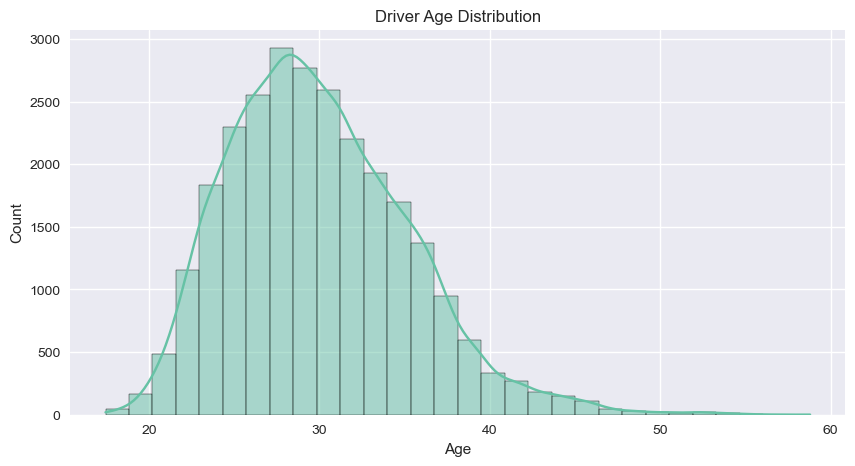

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(df["driver_age"], bins=30, kde=True)
plt.title("Driver Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

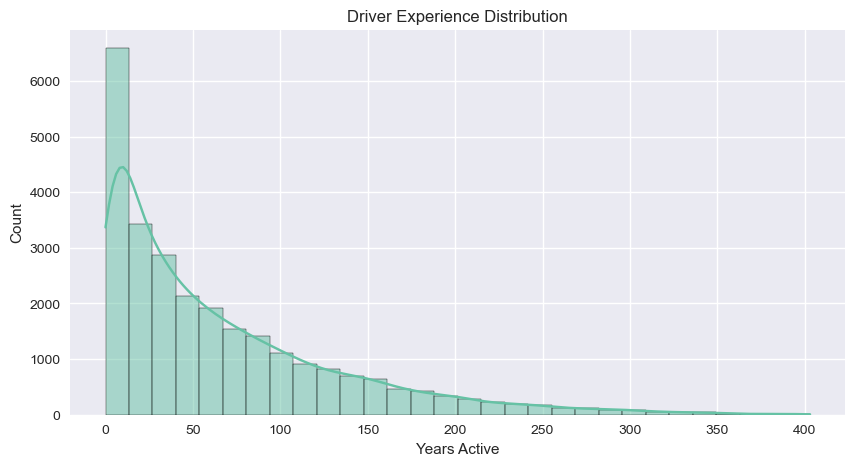

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(df["driver_experience"], bins=30, kde=True)
plt.title("Driver Experience Distribution")
plt.xlabel("Years Active")
plt.ylabel("Count")
plt.show()

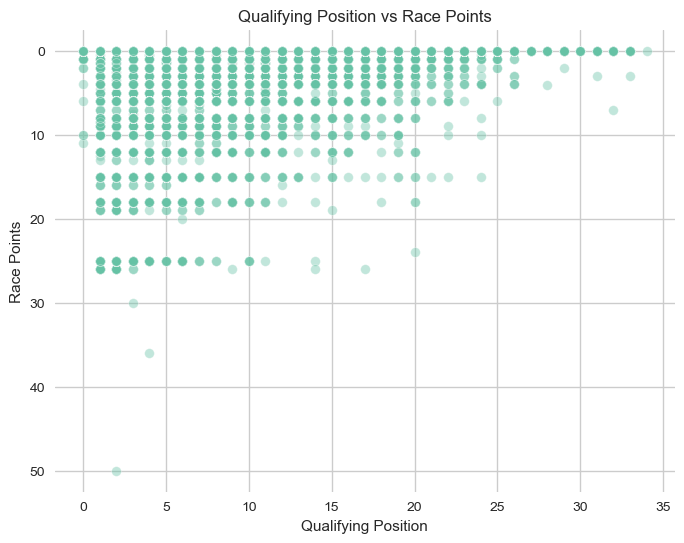

In [63]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="grid", y="points_x", alpha=0.4)
plt.title("Qualifying Position vs Race Points")
plt.xlabel("Qualifying Position")
plt.ylabel("Race Points")
plt.gca().invert_yaxis()
plt.show()

## 3. Constructor Performance

Explore:
- Constructor win counts
- Constructor podium counts
- Constructor dominance over time

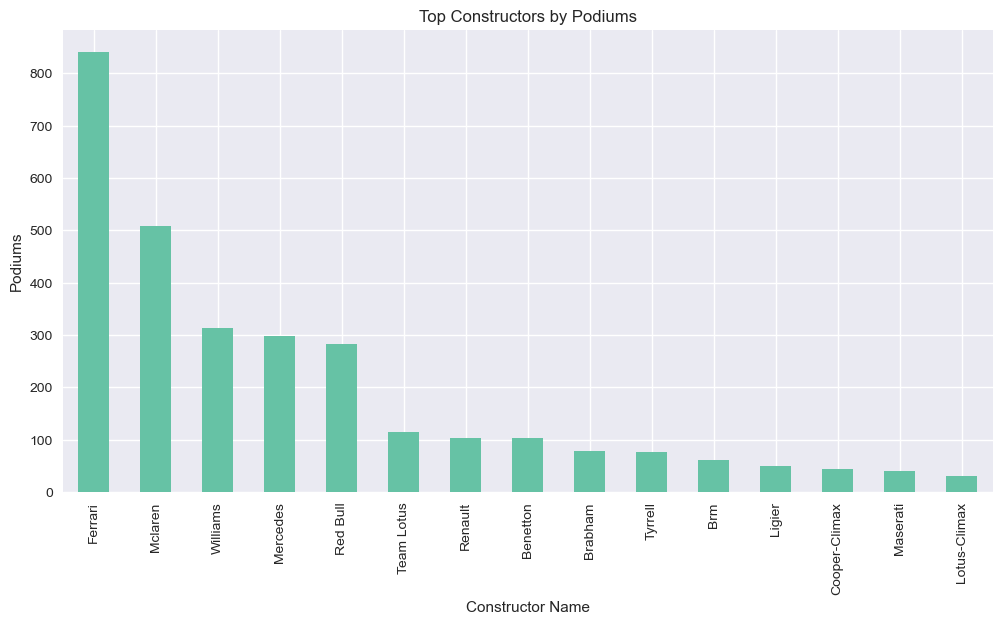

In [ ]:
#Used race_position rather than podium finishes to include all top 3 finishes and to avoid nulls and DNS/DNF weirdness

constructor_podiums = (
    df[df["race_position"] <= 3]
    .groupby("constructor_name")
    .size()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
constructor_podiums.head(15).plot(kind="bar")
plt.title("Top Constructors by Podiums")
plt.ylabel("Podiums")
plt.xlabel("Constructor Name")
plt.show()

## 4. Circuit Analysis

Examine:
- Circuits with the most races
- Fastest and Slowest circuits
- Circuits with the highest average speed
- Circuits where qualifying matters most

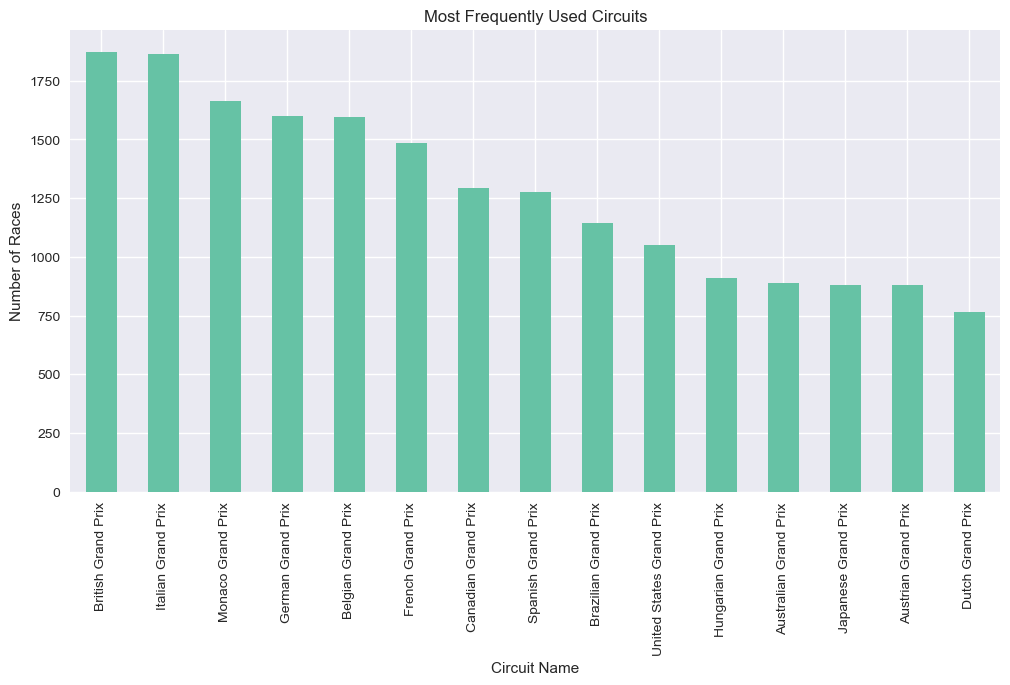

In [ ]:
circuit_counts = df.groupby("circuit_name").size().sort_values(ascending=False)

plt.figure(figsize=(12,6))
circuit_counts.head(15).plot(kind="bar")
plt.title("Most Frequently Used Circuits")
plt.ylabel("Number of Races")
plt.xlabel("Circuit Name")
plt.show()

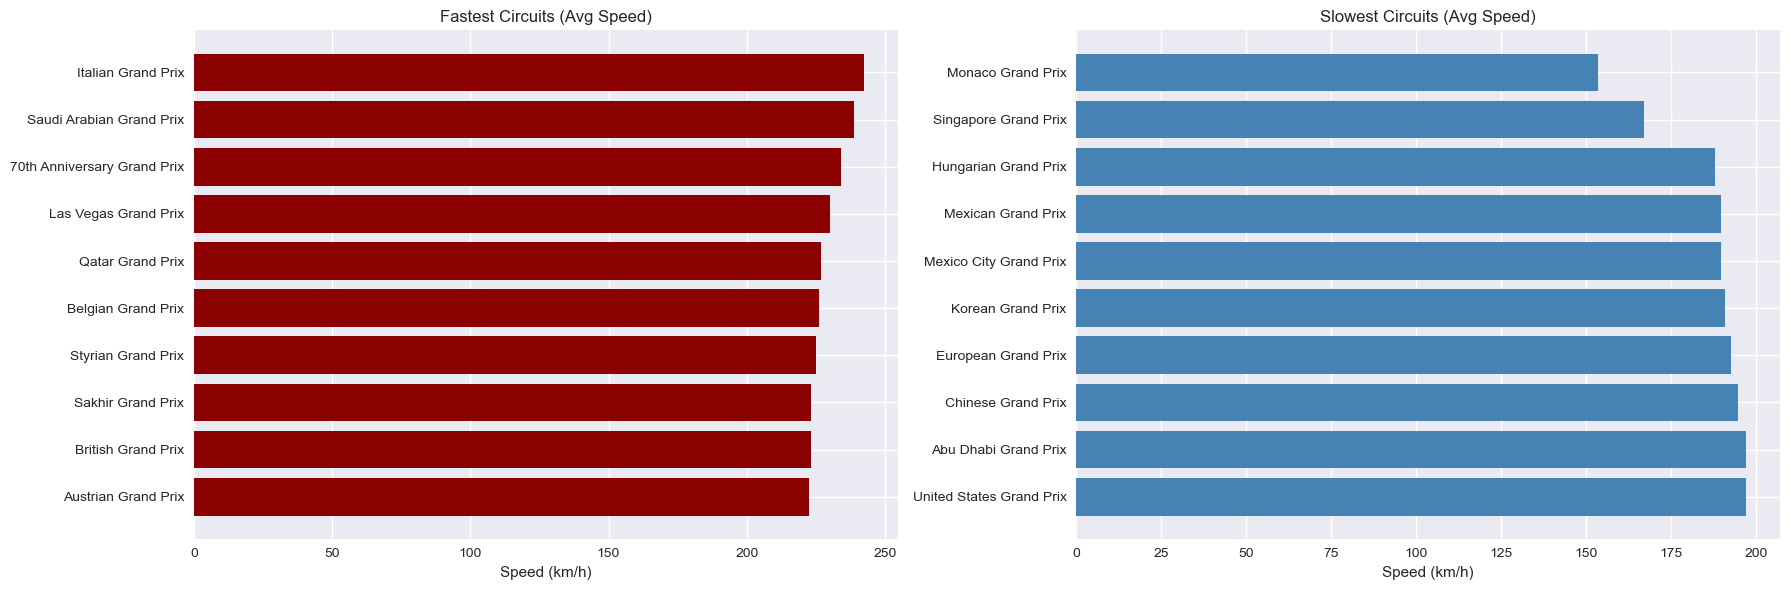

In [ ]:
# Convert fastestlapspeed to numeric
df["fastestlapspeed"] = pd.to_numeric(df["fastestlapspeed"], errors="coerce")

# Compute average speed per circuit
avg_speed = (
    df.groupby("circuit_name")["fastestlapspeed"]
      .mean()
      .dropna()
)

# Fastest 10 circuits
fastest = avg_speed.sort_values(ascending=False).head(10)

# Slowest 10 circuits
slowest = avg_speed.sort_values(ascending=True).head(10)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Fastest
axes[0].barh(fastest.index[::-1], fastest.values[::-1], color="darkred")
axes[0].set_title("Fastest Circuits (Avg Speed)")
axes[0].set_xlabel("Speed (km/h)")

# Slowest
axes[1].barh(slowest.index[::-1], slowest.values[::-1], color="steelblue")
axes[1].set_title("Slowest Circuits (Avg Speed)")
axes[1].set_xlabel("Speed (km/h)")

plt.tight_layout()
plt.show()

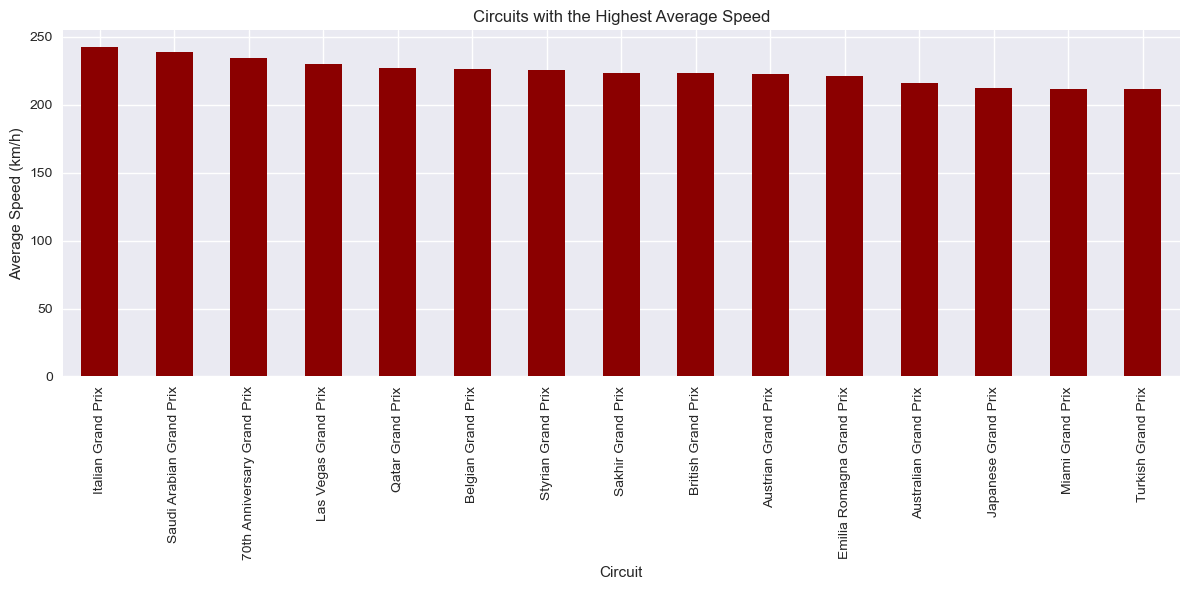

In [ ]:
# Convert fastestlapspeed to numeric
df["fastestlapspeed"] = pd.to_numeric(df["fastestlapspeed"], errors="coerce")

# Compute average speed per circuit (fastest first)
fastest_circuit_speed = (
    df.groupby("circuit_name")["fastestlapspeed"]
      .mean()
      .sort_values(ascending=False)
)

# Plot the 15 fastest circuits
plt.figure(figsize=(12,6))
fastest_circuit_speed.head(15).plot(kind="bar", color="darkred")
plt.title("Circuits with the Highest Average Speed")
plt.ylabel("Average Speed (km/h)")
plt.xlabel("Circuit")
plt.tight_layout()
plt.show()

## 5. Correlation Analysis

Check correlations between:
- driver_age
- driver_experience
- qualifying_position
- race_position
- constructor performance metrics


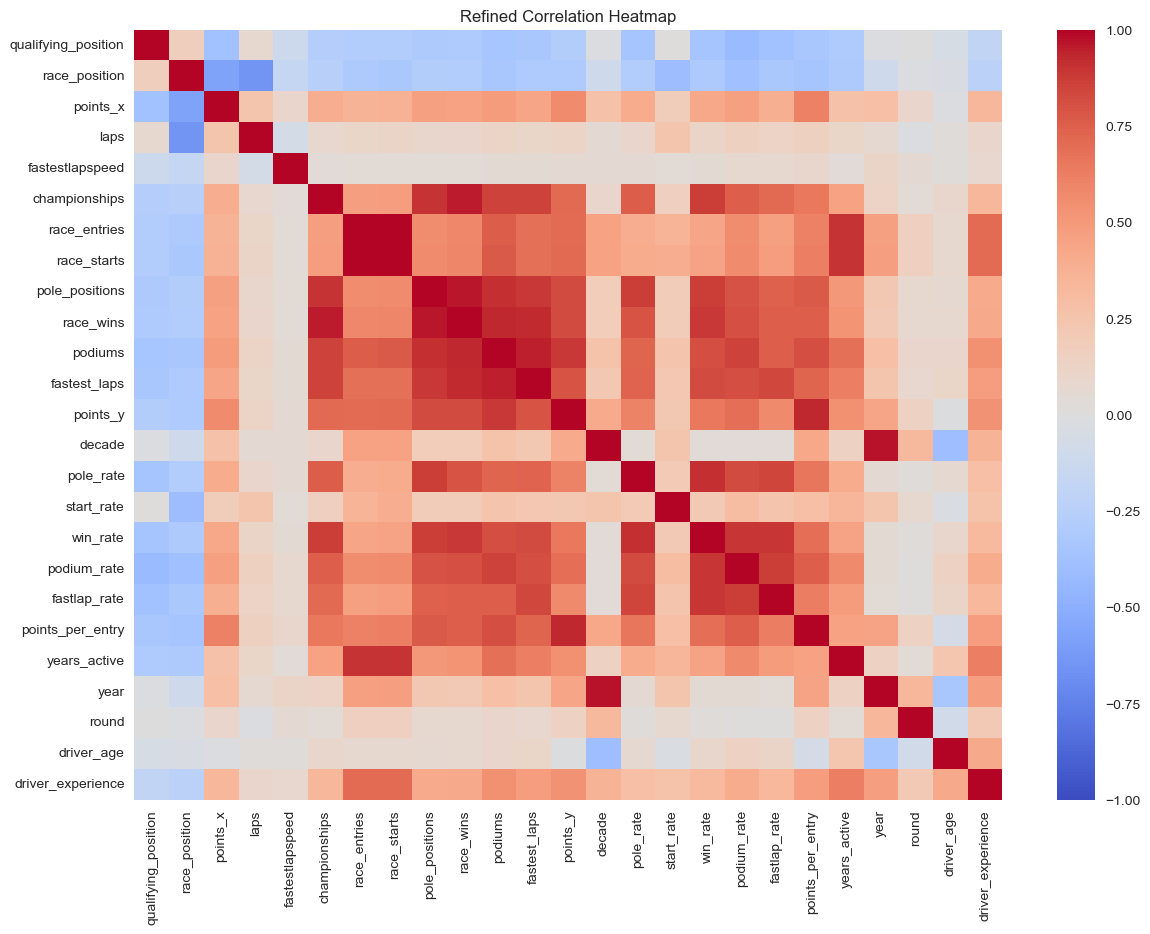

In [ ]:
# Drop ID and duplicate-prone columns
drop_cols = ["resultid", "raceid", "driverid", "constructorid", "statusid", "circuitid"]
numeric_df = df.drop(columns=drop_cols).select_dtypes(include=["int64", "float64"])

# Compute and plot correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False, vmin=-1, vmax=1)
plt.title("Refined Correlation Heatmap")
plt.show()

# 6. Key Insights

### Circuit Speed & Usage

- Italian Grand Prix consistently ranks as the fastest circuit, while Monaco is the slowest—unsurprising given Monaco’s tight street layout.
- Saudi Arabian GP and Las Vegas Grand Prix also shows high average speeds, suggesting newer circuits may favor speed (better track surface, newer design for speed)
- British and Italian GPs are the most frequently used, indicating historical prestige and consistency in the calendar.


### Driver Experience & Age

- Most drivers cluster around 5–15 years of experience, with a steep drop-off beyond that.
- Age distribution peaks around 30, aligning with peak performance years in F1.

### Qualifying vs Race Points

- Clear negative correlation: better qualifying positions yield higher race points.
- Some outliers suggest drivers who outperform their grid position—great candidates for deeper driver-specific analysis

### Correlation Analysis

- The correlation heatmap reveals strong interdependencies between key performance metrics. Notably, podiums, wins, and pole positions are highly correlated, suggesting that top-performing drivers and constructors tend to excel across multiple dimensions. 
- Rate-based metrics (e.g., win_rate, podium_rate, pole_rate) also show strong alignment, reinforcing their value as consistent indicators of competitive success. 
- Additionally, fastest lap rate correlates well with points per entry, highlighting its predictive potential for overall race performance.

### Other areas of analysis 

- Explore how circuit speed correlates with overtaking opportunities, safety incidents, or race outcomes.
- Comparing podiums per season or per race to highlight efficiency vs legacy.
- Analyze how age and experience relate to podium finishes or consistency — are younger drivers more erratic but faster?


# 7. Circuit Speed vs Position Change

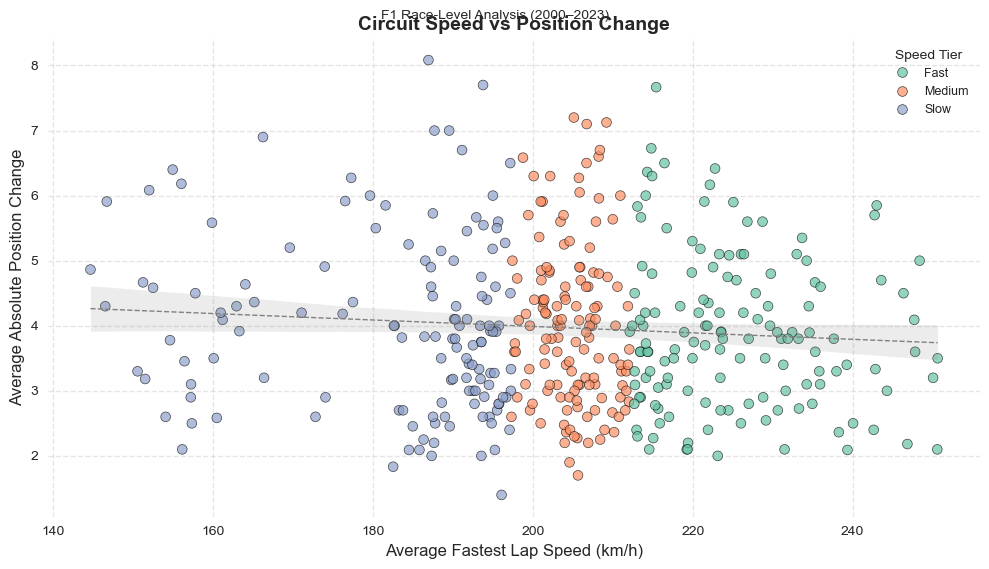

In [47]:
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=race_level,
    x='avg_fastest_speed',
    y='avg_abs_position_change',
    hue='speed_tier',  # cleaner grouping than circuit_name
    palette='Set2',
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5
)

sns.regplot(
    data=race_level,
    x='avg_fastest_speed',
    y='avg_abs_position_change',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 1, 'linestyle': 'dashed'}
)

plt.title('Circuit Speed vs Position Change', fontsize=14, fontweight='bold')
plt.suptitle('F1 Race-Level Analysis (2000–2023)', fontsize=10, y=0.94)
plt.xlabel('Average Fastest Lap Speed (km/h)', fontsize=12)
plt.ylabel('Average Absolute Position Change', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(title='Speed Tier', title_fontsize=10, fontsize=9, loc='upper right')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Average Absolute Position Change')

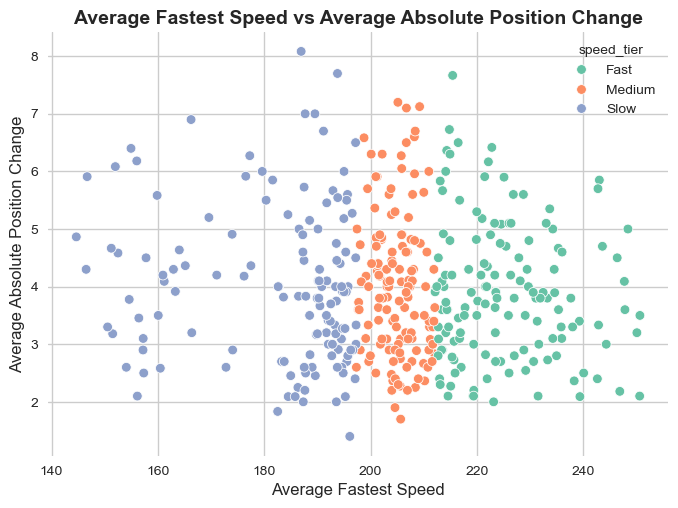

In [51]:
sns.scatterplot(
    data=race_level,
    x='avg_fastest_speed',
    y='avg_abs_position_change',
    hue='speed_tier'
)

plt.title('Average Fastest Speed vs Average Absolute Position Change', fontsize=14, fontweight='bold')
plt.xlabel('Average Fastest Speed', fontsize=12)
plt.ylabel('Average Absolute Position Change', fontsize=12)

Text(0, 0.5, 'Average Absolute Position Change')

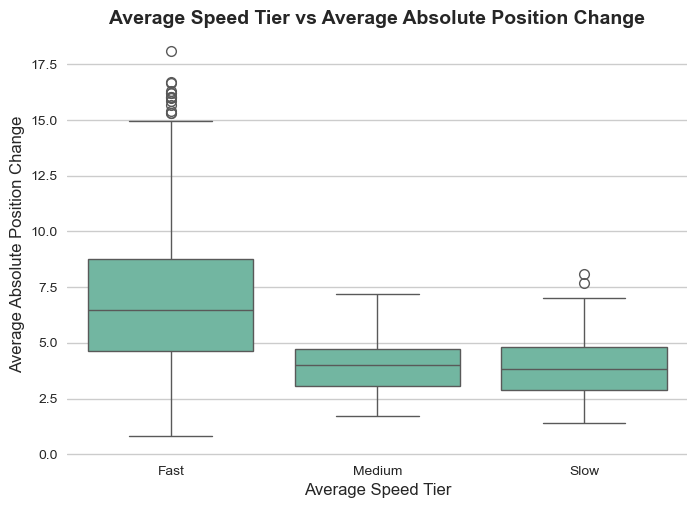

In [52]:
sns.boxplot(
    data=race_level,
    x='speed_tier',
    y='avg_abs_position_change'
)

plt.title('Average Speed Tier vs Average Absolute Position Change', fontsize=14, fontweight='bold')
plt.xlabel('Average Speed Tier', fontsize=12)
plt.ylabel('Average Absolute Position Change', fontsize=12)

In [50]:
race_level[['avg_fastest_speed','avg_abs_position_change','overtake_density']].corr()

,avg_fastest_speed,avg_abs_position_change,overtake_density
avg_fastest_speed,1.000000,-0.080791,-0.030236
avg_abs_position_change,-0.080791,1.000000,-0.215144
overtake_density,-0.030236,-0.215144,1.000000


## 8. Circuit Speed vs DNF Rate


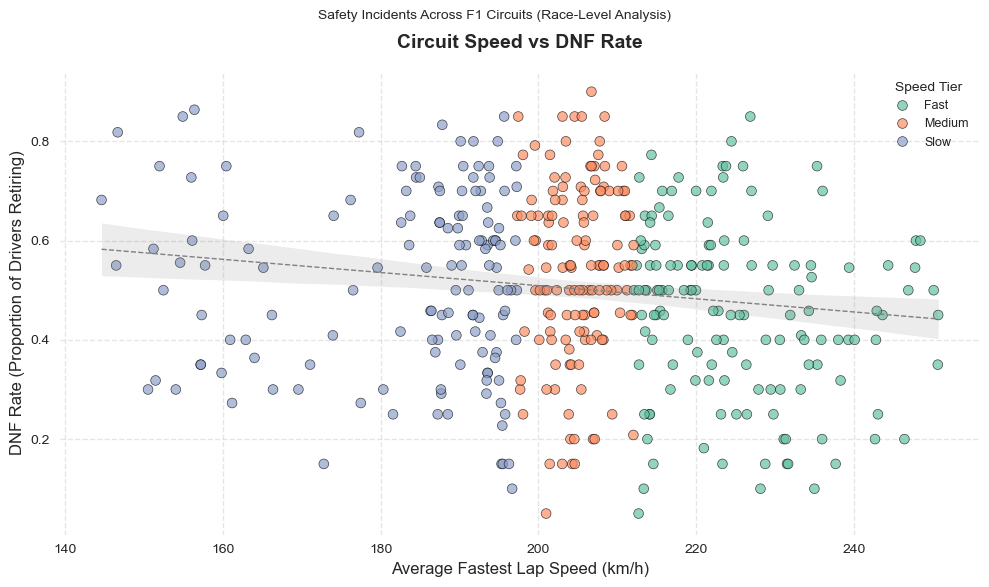

In [58]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

sns.scatterplot(
    data=race_level,
    x='avg_fastest_speed',
    y='dnf_rate',
    hue='speed_tier',
    palette='Set2',
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5
)

# Regression line
sns.regplot(
    data=race_level,
    x='avg_fastest_speed',
    y='dnf_rate',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 1, 'linestyle': 'dashed'}
)

plt.title(
    'Circuit Speed vs DNF Rate',
    fontsize=14,
    fontweight='bold',
    y=1.03   # move title upward
)

plt.suptitle(
    'Safety Incidents Across F1 Circuits (Race-Level Analysis)',
    fontsize=10,
    y=0.97
)

plt.xlabel('Average Fastest Lap Speed (km/h)', fontsize=12)
plt.ylabel('DNF Rate (Proportion of Drivers Retiring)', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(title='Speed Tier', fontsize=9, title_fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()

## 9. DNF Rate by Speed Tier

C:\Users\leebe\AppData\Local\Temp\ipykernel_11228\2065099836.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


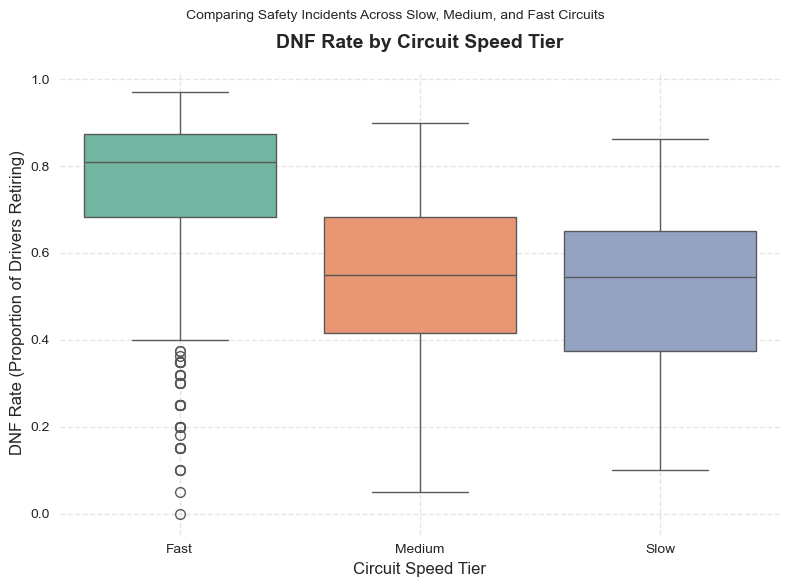

In [59]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')

sns.boxplot(
    data=race_level,
    x='speed_tier',
    y='dnf_rate',
    palette='Set2'
)

plt.title(
    'DNF Rate by Circuit Speed Tier',
    fontsize=14,
    fontweight='bold',
    y=1.03   # move title upward
)

plt.suptitle(
    'Comparing Safety Incidents Across Slow, Medium, and Fast Circuits',
    fontsize=10,
    y=0.97
)

plt.xlabel('Circuit Speed Tier', fontsize=12)
plt.ylabel('DNF Rate (Proportion of Drivers Retiring)', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 10. Circuit Speed vs Total Drivers Retired

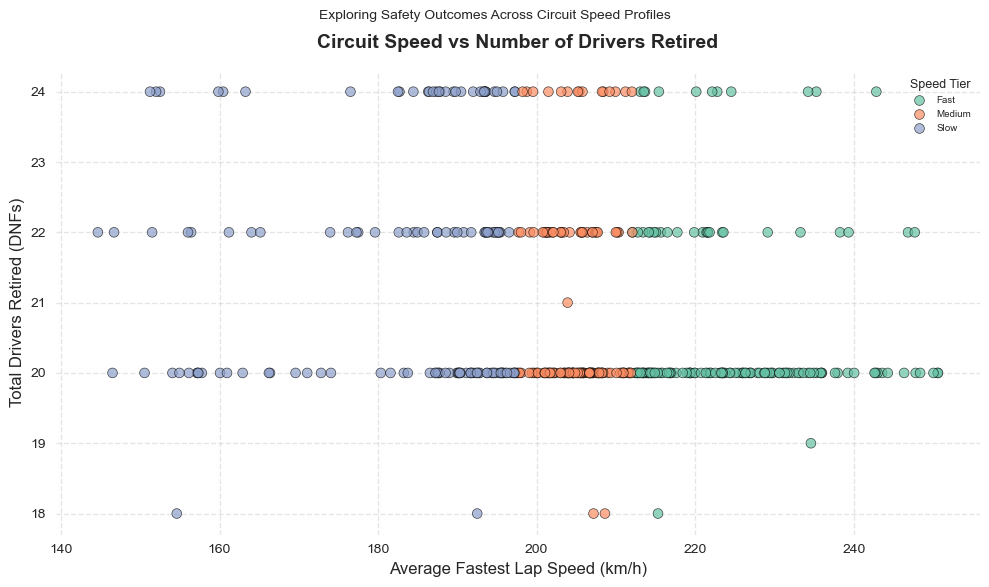

In [64]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

sns.scatterplot(
    data=race_level,
    x='avg_fastest_speed',
    y='total_drivers',
    hue='speed_tier',
    palette='Set2',
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5
)

plt.title(
    'Circuit Speed vs Number of Drivers Retired',
    fontsize=14,
    fontweight='bold',
    y=1.03   # move title upward
)

plt.suptitle(
    'Exploring Safety Outcomes Across Circuit Speed Profiles',
    fontsize=10,
    y=0.97
)

plt.xlabel('Average Fastest Lap Speed (km/h)', fontsize=12)
plt.ylabel('Total Drivers Retired (DNFs)', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(title='Speed Tier', fontsize=7, title_fontsize=9, loc='upper right')

plt.tight_layout()
plt.show()